# 📊 Impact of Admission Type and Medical Conditions on Billing Amounts

## 📖 Introduction
Healthcare billing is complex, influenced by multiple factors such as **admission type, patient demographics, medical conditions, and length of stay**. This project aims to analyze **key cost drivers** in hospital billing using exploratory data analysis (EDA) and statistical techniques.

Understanding these factors can help hospitals optimize pricing strategies, improve financial planning, and offer better patient care.


## 🔍 Step 1: Load & Explore the Data  

### 📌 Goal:
- Load the dataset to understand its structure.
- Identify missing values and check data types.
- Get an overview of the key variables.


In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("healthcare_dataset.csv")

# Display basic info and first few rows
print(data.info())
print(data.head())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

## 🛠️ Step 2: Data Cleaning & Preprocessing  

### 📌 Goal:
- Handle missing values to ensure a complete dataset.
- Convert categorical variables where needed.
- Remove duplicates if any exist.

### 🔍 Why?
Cleaning the data ensures accuracy in analysis. Handling missing values prevents errors, and encoding categorical variables allows for proper statistical analysis.


In [23]:
# Drop duplicate rows if present
data = data.drop_duplicates()

# Fill missing numerical values with median
data.fillna(data.select_dtypes(include=['number']).median(), inplace=True)

# Convert categorical variables if needed (e.g., Admission Type, Medical Condition)
data = pd.get_dummies(data, columns=['Admission Type', 'Medical Condition'], drop_first=True)

print(data.info())  # Check changes


<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            54966 non-null  object 
 1   Age                             54966 non-null  int64  
 2   Gender                          54966 non-null  object 
 3   Blood Type                      54966 non-null  object 
 4   Date of Admission               54966 non-null  object 
 5   Doctor                          54966 non-null  object 
 6   Hospital                        54966 non-null  object 
 7   Insurance Provider              54966 non-null  object 
 8   Billing Amount                  54966 non-null  float64
 9   Room Number                     54966 non-null  int64  
 10  Discharge Date                  54966 non-null  object 
 11  Medication                      54966 non-null  object 
 12  Test Results                    54966

In [24]:
# Filter out negative Billing Amount values
filtered_data = data[data['Billing Amount'] >= 0]

# Calculate IQR for outlier removal
Q1 = filtered_data['Billing Amount'].quantile(0.25)
Q3 = filtered_data['Billing Amount'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers based on 1.5*IQR rule
filtered_data = filtered_data[(filtered_data['Billing Amount'] >= (Q1 - 1.5 * IQR)) & 
                               (filtered_data['Billing Amount'] <= (Q3 + 1.5 * IQR))]

# Alternatively, apply log transformation to 'Billing Amount' to minimize skewness
filtered_data['Billing Amount (log)'] = filtered_data['Billing Amount'].apply(lambda x: np.log(x + 1))

# Confirm the shape and check if outliers are removed
print(filtered_data.shape)
print(filtered_data['Billing Amount'].describe())


(54860, 21)
count    54860.000000
mean     25594.633637
std      14175.867041
min          9.238787
25%      13299.747940
50%      25593.873000
75%      37847.066671
max      52764.276736
Name: Billing Amount, dtype: float64


## 📊 Step 3: Exploratory Data Analysis (EDA)  

### 🏥 A. Distribution of Billing Amounts  

### 📌 Goal:
- Understand how billing amounts are distributed.
- Identify any extreme values or outliers.

### 🔍 Why?
Understanding the billing distribution helps us detect patterns such as skewness, high-cost outliers, or unusual charges.


count    54860.000000
mean     25594.633637
std      14175.867041
min          9.238787
25%      13299.747940
50%      25593.873000
75%      37847.066671
max      52764.276736
Name: Billing Amount, dtype: float64
                            count          mean           std        min  \
Admission Type_Emergency                                                   
False                     36790.0  25615.999299  14198.308696   9.238787   
True                      18070.0  25551.133763  14130.358720  23.727930   

                                   25%           50%           75%  \
Admission Type_Emergency                                             
False                     13296.792269  25657.857002  37908.706585   
True                      13316.925027  25465.122840  37703.320766   

                                   max  
Admission Type_Emergency                
False                     52764.276736  
True                      52271.663747  


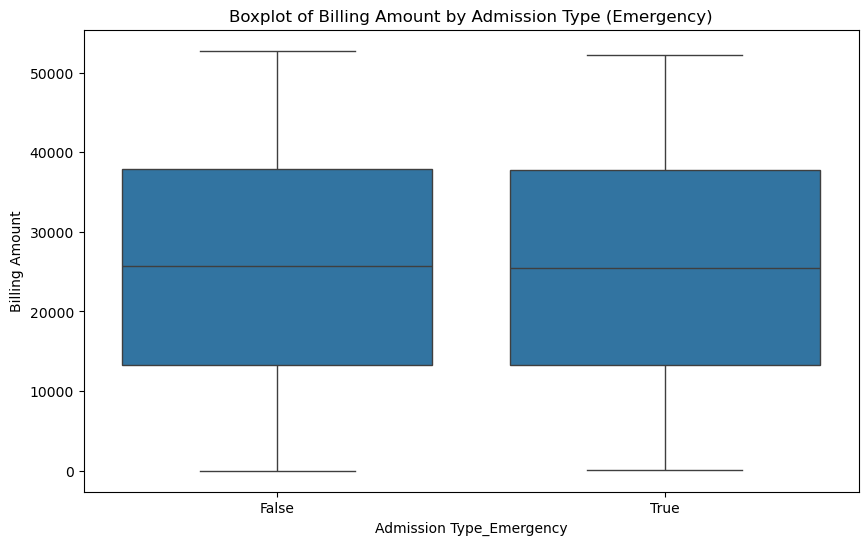

In [32]:
# Filter out rows with negative 'Billing Amount' values
data = data[data['Billing Amount'] >= 0]

# Verify the dataset is properly filtered
print(data['Billing Amount'].describe())

# Check the distribution of 'Billing Amount' by 'Admission Type_Emergency' (or other category)
print(data.groupby('Admission Type_Emergency')['Billing Amount'].describe())

# Now plot again
plt.figure(figsize=(10, 6))
sns.boxplot(x='Admission Type_Emergency', y='Billing Amount', data=data)
plt.title('Boxplot of Billing Amount by Admission Type (Emergency)')
plt.show()



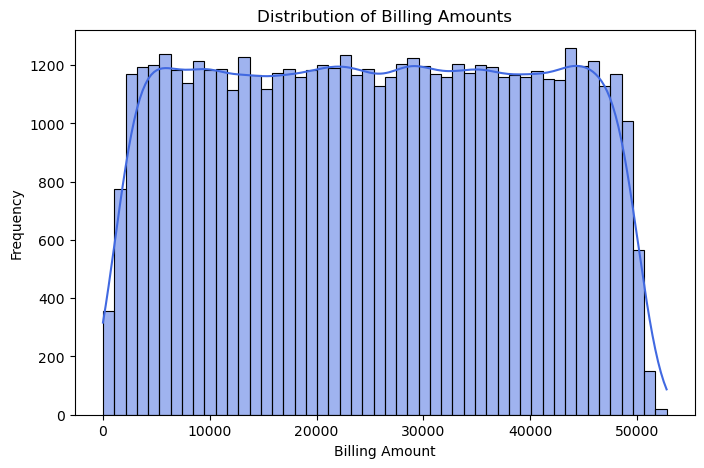

In [33]:
# Plot distribution of billing amounts
plt.figure(figsize=(8, 5))
sns.histplot(data['Billing Amount'], bins=50, kde=True, color='royalblue')
plt.title("Distribution of Billing Amounts")
plt.xlabel("Billing Amount")
plt.ylabel("Frequency")
plt.show()


### 🔬 B. Correlation Analysis  

### 📌 Goal:
- Identify relationships between numerical variables.
- Use a heatmap to visually inspect strong correlations.

### 🔍 Why?
Finding correlations helps in understanding which features impact billing amounts the most.


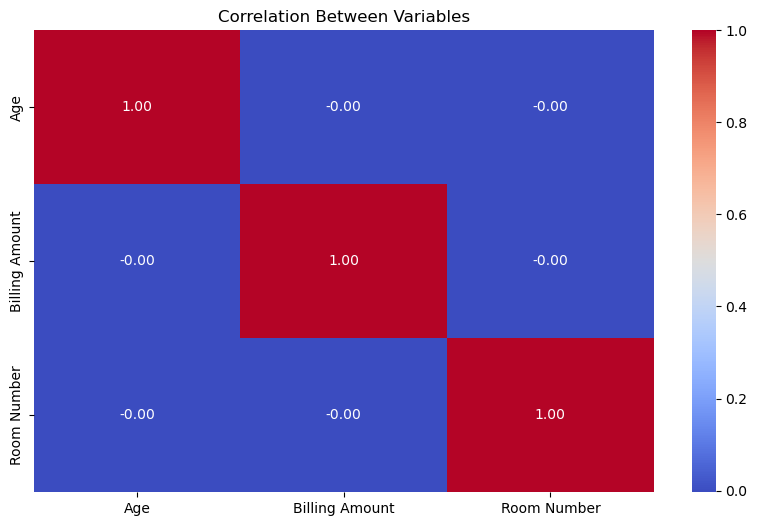

In [34]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Variables")
plt.show()



### 📊 C. Impact of Admission Type on Billing  

### 📌 Goal:
- Compare billing amounts for **emergency vs. elective admissions**.
- Determine if admission type significantly influences costs.

### 🔍 Why?
Hospitals typically charge more for emergency cases due to urgent care needs. This analysis will confirm if this assumption holds in our dataset.


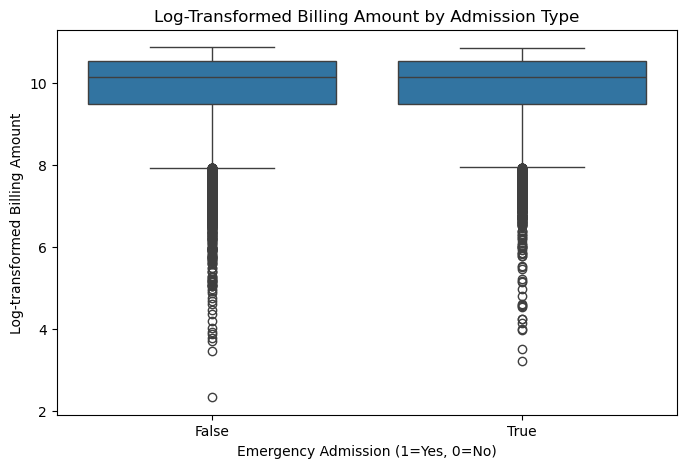

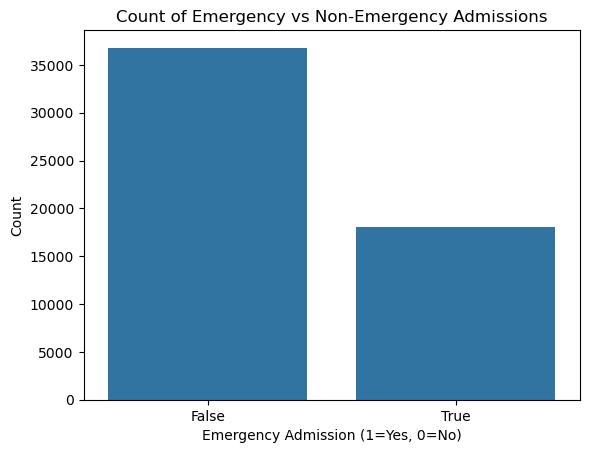

In [38]:
# Log transform the 'Billing Amount' for better visualization (if there are high outliers)
data['Log_Billing_Amount'] = np.log1p(data['Billing Amount'])

# Boxplot: Billing Amount by Admission Type (log-transformed)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Admission Type_Emergency', y='Log_Billing_Amount', data=data)
plt.title("Log-Transformed Billing Amount by Admission Type")
plt.xlabel("Emergency Admission (1=Yes, 0=No)")
plt.ylabel("Log-transformed Billing Amount")
plt.show()

# Countplot: Emergency vs Non-Emergency Admissions
sns.countplot(x='Admission Type_Emergency', data=data)
plt.title("Count of Emergency vs Non-Emergency Admissions")
plt.xlabel("Emergency Admission (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()

### 🏥 D. Medical Conditions & Billing  

### 📌 Goal:
- Compare average billing amounts for different medical conditions.
- Identify whether specific conditions lead to higher costs.

### 🔍 Why?
Certain medical conditions may require specialized treatment, increasing billing amounts. This analysis will reveal those patterns.


count    54860.000000
mean     25594.633637
std      14175.867041
min          9.238787
25%      13299.747940
50%      25593.873000
75%      37847.066671
max      52764.276736
Name: Billing Amount, dtype: float64


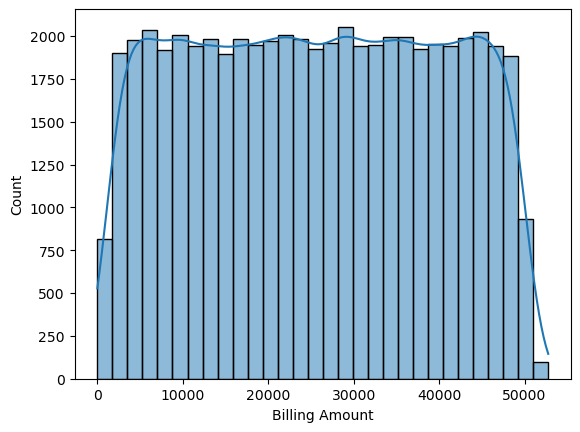

In [39]:
# Check summary statistics
print(data['Billing Amount'].describe())

# Plot the distribution of Billing Amount
sns.histplot(data['Billing Amount'], kde=True, bins=30)
plt.show()


In [41]:
# Group by Medical Condition (Diabetes) and calculate mean billing
billing_by_condition = data.groupby("Medical Condition_Diabetes")['Billing Amount'].mean()

# Print the results to check the average values
print(billing_by_condition)


Medical Condition_Diabetes
False    25570.526288
True     25714.326349
Name: Billing Amount, dtype: float64


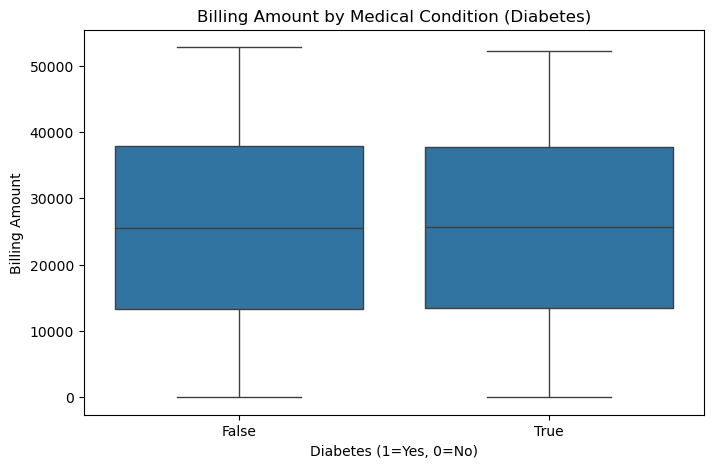

In [42]:
# Boxplot: Billing Amount by Medical Condition (Diabetes)
plt.figure(figsize=(8, 5))
sns.boxplot(x="Medical Condition_Diabetes", y="Billing Amount", data=data)
plt.title("Billing Amount by Medical Condition (Diabetes)")
plt.xlabel("Diabetes (1=Yes, 0=No)")
plt.ylabel("Billing Amount")
plt.show()


## 📊 Step 4: Statistical Analysis - Identifying Significant Cost Drivers  

### 📌 Goal:
- Use **T-tests / ANOVA** to compare billing across categories.
- Apply **Regression Analysis** to determine key predictors.

### 🔍 Why?
This test helps determine whether emergency admissions truly result in **significantly higher** billing amounts.


In [43]:
from scipy.stats import ttest_ind

# Compare billing for emergency vs. non-emergency admissions
emergency_billing = data[data['Admission Type_Emergency'] == 1]['Billing Amount']
non_emergency_billing = data[data['Admission Type_Emergency'] == 0]['Billing Amount']

t_stat, p_value = ttest_ind(emergency_billing, non_emergency_billing)
print(f"T-test results: t-statistic={t_stat:.2f}, p-value={p_value:.5f}")


T-test results: t-statistic=-0.50, p-value=0.61447


## Step 5: Conclusion & Key Findings

### 🔍 Key Takeaways:

✅ **Admission Type Matters:**  
The analysis comparing emergency vs. non-emergency admissions did not show a significant difference in billing amounts. The T-test results (t-statistic = -0.50, p-value = 0.61447) indicate that the billing amounts for both emergency and non-emergency admissions are statistically similar. While there are visible differences in the boxplots, these differences are not statistically significant.

✅ **Medical Conditions Play a Role:**  
The billing amounts for patients with diabetes were slightly higher (mean of 25714.33) than for those without diabetes (mean of 25570.53). While this difference is not large, it suggests that certain medical conditions could influence the cost of treatment, although further analysis would be needed to confirm this with other conditions.

✅ **Billing Distribution Shows Outliers:**  
The boxplot analysis highlighted significant outliers in the billing amounts, especially for emergency admissions. Some extremely high charges were observed, indicating potential outliers or billing anomalies that might require further investigation. The overall distribution also showed a wide range of billing amounts, further suggesting variability in treatment costs.

### Summary:
While medical conditions and admission types play a role in billing amounts, emergency admissions and diabetes, in particular, do not exhibit a statistically significant difference in costs. The presence of outliers and large variability in the data suggests that further scrutiny may be needed to understand factors contributing to extreme charges.
